In [4]:
# plotting
import matplotlib.pyplot as plt

# image processing
import cv2

# opening files and paths
import os

import time

%reload_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from shapely.geometry import CAP_STYLE, JOIN_STYLE

'''
CUSTOM MODULES
'''
# import utility functions
from shapely_conversion import convert
from shapely_utilities import *

In [3]:
'''
Plot a single path
'''
def plot_path(path, color=None):
    
    X = []
    Y = []

    for p in path:
        X.append(p[0])
        Y.append(p[1])
        
    plt.plot(X,Y,c=color)


'''
Plot a list of paths
'''
def plot_recursive_path(total_path, color=None, endpoints=False, intersections=False):
    
    rest = []
    
    for path in total_path:
        
        if type(path) is list:
            plot_path(path, color)
            if intersections:
                for i in self_intersections_binary(LineString(path)):
                    pyplot.scatter(i.x,i.y, c='red')
                
        else:
            rest.append(path)
            
    plot_path(rest, color)

In [5]:
from spiral import Spiral, SpiralGenerator

In [88]:
%%time
'''
This cell runs the complete pipeline from image to CFS output
'''

# distance in between each contour
distance = 10

# filename of image to process
filename = 'files/oval.png'

# image should be in binary format
image = cv2.imread(filename,0)

print(not image is None)

polygons = convert(image, approximation = cv2.CHAIN_APPROX_SIMPLE, optimize=True, simplify=1)

True
CPU times: user 9.98 ms, sys: 2.3 ms, total: 12.3 ms
Wall time: 5.07 ms


In [89]:
generator = SpiralGenerator(polygons, 10)
spirals = generator.generate()

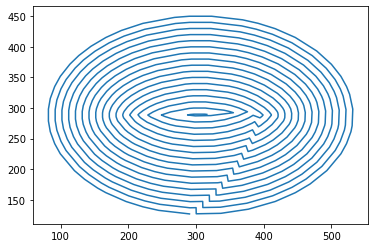

In [90]:
%matplotlib inline

for spiral in spirals:
    plot_path(spiral.get_path())

In [91]:
from fermat_spiral import FermatSpiralGenerator

In [93]:
generator = FermatSpiralGenerator(spirals[-1], 10)
test, reverse = generator.generate()

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


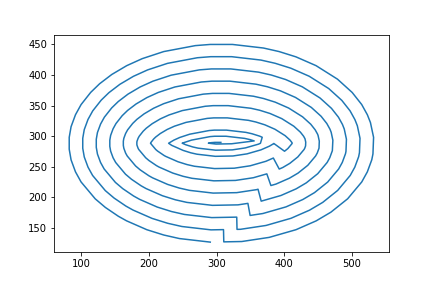

In [94]:
%matplotlib
plot_path([c for contour in test for c in contour.coords])
plot_path([c for contour in reverse for c in contour.coords])


In [ ]:
rev

In [ ]:
from metrics import Metrics

measurer = Metrics(segments=True, commands=True, curvature=False, underfill=True, overfill=True)

In [ ]:
'''
Test different fills
'''

%matplotlib inline

metrics = []

# filename of image to process
filename = 'files/penguin.png'

# image should be in binary format
image = cv2.imread(filename,0)

print(not image is None)

polygons = generate_polygons(image, True, simplify=1)

for i in range(1,10):
    print(i)
    results = FS.execute(polygons, i, connected=True)
    plot_recursive_path(results)
    pyplot.show()
    metrics.append(measurer.measure(results, "CFS", i, polygons))

In [ ]:
'''
Converting results to dataframe
'''
import pandas as pd

data = pd.DataFrame(metrics)

data["Underfill"] *= 100
data["Overfill"] *= 100

data

In [ ]:
'''
Display the underfill areas (sanity check)
'''

from shapely.geometry import MultiPolygon

path_areas = [LineString(path).buffer(9/2+0.000001) for path in results]
MultiPolygon(polygons).difference(MultiPolygon(path_areas))

In [19]:
# helper function to display the format of the "result" tree
# - the "result" tree is the representation of the distance transform 
# - EX: A tree of "['X','X','X', ['X',['X','X'], ['X']], ['X']]" has...
# 1. Three successive outer contours (no branches)
# 2. A branch with a single contour with a depth-2 branch and a depth-1 branch
# 3. A branch with a single contour

# TODO there is probably a better way to set up the trees in this scenario
def simplify_tree(result):
    
    root = []
    output = []
    for b in result:
        if type(b) is list:
            
            if not b:
                print("EMPTY!")
            output.append(simplify_tree(b))
            
    return ["X"] + output